In [ ]:
!pip install xarray

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cf
from matplotlib.colors import LinearSegmentedColormap

### Masking out the data over land

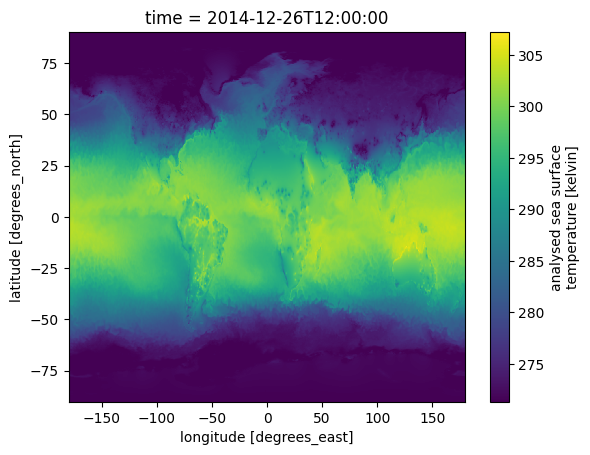

In [4]:
ds2 = xr.open_dataset("../data/test_plot (OSTIA-UKMO)/20141226120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc")
ds2['analysed_sst'].plot()

In [ ]:
analysed_sst = ds2["analysed_sst"]
mask = ds2["mask"]

In [ ]:
analysed_sst.where(mask == 1.0).plot()

In [ ]:
import os

input_folder = 'data\chosen_dataset'
output_folder = 'data\masked_dataset'

files = [f for f in os.listdir(input_folder)]

In [ ]:
for file in files:
    in_path = os.path.join(input_folder, file)
    out_file = file.replace('.nc', '_masked2.nc')
    out_path = os.path.join(output_folder, out_file)
    
    ds = xr.open_dataset(in_path)
    
    analysed_sst = ds["analysed_sst"]
    mask = ds["mask"]
    masked_analysed_sst = analysed_sst.where(mask == 1)
    
    masked_analysed_sst.to_netcdf(out_path, encoding={'analysed_sst': {'zlib': True, 'complevel': 4}})
    
    ds.close()
    
print("done")

### Experimenting with the netCDF format

In [ ]:
# previous dataset, unfeasable

# ds1 = xr.open_dataset('data/test_plot (OSTIA-UKMO)/20141226120000-UKMO-L4_GHRSST-SSTfnd-OSTIA-GLOB-v02.0-fv02.0.nc')
# ds1["analysed_sst"].plot()
# ds1

In [ ]:
analyzed_sst = ds2.variables['analysed_sst']
lat = ds2.variables['lat'][:]
lon = ds2.variables['lon'][:]
time = ds2.variables['time'][:]

In [ ]:
ds2["analysed_sst"].plot()

### Trying different plot types

In [ ]:
ax = plt.axes(projection = ccrs.Orthographic(77.8, 22.22))
# ax.coastlines()
p = ds2["analysed_sst"].isel(time = -1).plot(transform = ccrs.PlateCarree())

In [ ]:
projection = ccrs.PlateCarree()

fig, ax = plt.subplots(subplot_kw={'projection': projection})

im = ax.pcolormesh(lon, lat, analyzed_sst[:, :, :], cmap=colormap, transform=projection)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
ax.add_feature(cf.STATES, linestyle='--')
ax.add_feature(cf.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')
ax.add_feature(cf.RIVERS)

# Set the plot title and colorbar label
plt.title(f'Sea Surface Temperature')
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label('Sea Surface Temperature (°C)')

# Show the plot
plt.show()

In [ ]:
analyzed_sst.plot()
contour_levels = [25, 26, 27, 28, 29, 30]  # Define contour levels as needed
contour = analyzed_sst.plot.contour(levels=contour_levels, colors='k', linestyles='dashed', add_colorbar=False)

In [ ]:
projection = ccrs.Mercator()
crs = ccrs.PlateCarree()

plt.figure(dpi=150)
ax = plt.axes(projection = projection, frameon = True)
gl = ax.gridlines(crs = crs, draw_labels=True, alpha = 0.5, color = 'grey')

ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)

# lon_min = -20
# lon_max = 45
# lat_min = 34
# lat_max = 60

# ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)

# cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
# ds2["analysed_sst"][["lat", "lon"]].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=21)

ds2["analysed_sst"].plot()

### Testing if masked successfully

In [ ]:
ds = xr.open_dataset('data/test_plot (OSTIA-UKMO)/20141231120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0_masked2.nc')

In [ ]:
ds['analysed_sst'].plot()

In [ ]:
ds